In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

plt.rcParams['text.usetex'] = True

## Density

In [17]:
# Define the functions

k = 5/2

def g(r):
    return np.log(((1 - 2*c + c**2 + 4*k*r + 2*c*k*r + 3*k**2*r**2) / (3*k*r + 3*k**2*r**2))**((-4 + c)/(-1 + c)))


def rho(r):
    return (1 / (32 * (-1 + c)**2 * np.pi * (1 + c**2 + 4 * k * r + 3 * k**2 * r**2 + 2 * c * (-1 + k * r))**6)) * \
            81 * (-4 + c) * c * k**4 * r**2 * (1 + k * r)**2 * \
            (((1 - 2 * c + c**2 + 4 * k * r + 2 * c * k * r + 3 * k**2 * r**2) / (3 * k * r + 3 * k**2 * r**2))**((3 * c) / (-1 + c))) * \
            (3 + 12 * k * r - 14 * k**2 * r**2 - 116 * k**3 * r**3 - 93 * k**4 * r**4 + 
             c**4 * (3 + 12 * k * r + 4 * k**2 * r**2) + 
             4 * c**3 * (-3 - 12 * k * r + 5 * k**2 * r**2 + 2 * k**3 * r**3) - 
             6 * c**2 * (-3 - 12 * k * r + 11 * k**2 * r**2 - 2 * k**3 * r**3 + 2 * k**4 * r**4) + 
             4 * c * (-3 - 12 * k * r + 14 * k**2 * r**2 + 24 * k**3 * r**3 + 33 * k**4 * r**4))

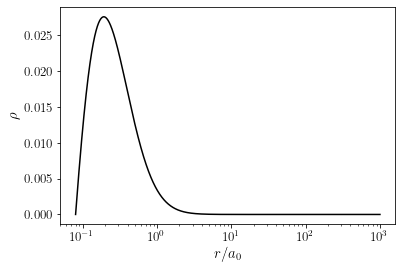

In [18]:
c = 0.4
sigma = (1-c)/(3*k)

kk = 10**-10
start = sigma
end = 10**3
r_vals = np.linspace(np.log(start/kk), np.log(end/kk), 10**4)
r_values = kk*np.exp(r_vals)


rho_values = [rho(r) for r in r_values]
rho_values = np.nan_to_num(rho_values)

# Plot the results
plt.plot(r_values, rho_values, 'k', label=r'$\rho$')
plt.xlabel('$r/{a_0}$', fontsize = 15)
plt.ylabel(r'$\rho$', fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xscale('log')
plt.savefig('..//figures//caseiDens.pdf')
plt.show()

del c

## $g_{rr}$ plots

In [19]:
c = 0.4
sigma = (1-c)/(3*k)
#Range of vals

kk = 10**-10
start = sigma
end = 10**3
r_vals = np.linspace(np.log(start/kk), np.log(end/kk), 10**4)
r_values = kk*np.exp(r_vals)

def grr(r):
    return np.exp(g(r))

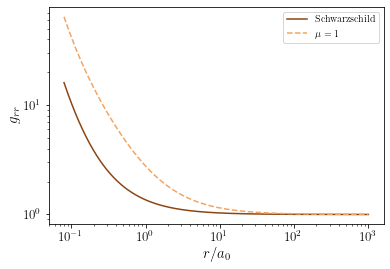

In [20]:
grr_1 = [grr(r) for r in r_values]

# Schwarzschild

grr_schw = [(1+(sigma/r))**4 for r in r_values]

# Plot the results
plt.plot(r_values, grr_schw, c = 'saddlebrown', linestyle ='-', label=r'$\mathrm{Schwarzschild}$')
plt.plot(r_values, grr_1, c = 'sandybrown', linestyle= '--', label=r'$\mu=1$')
plt.xlabel('$r/{a_0}$', fontsize = 15)
plt.ylabel(r'$g_{rr}$', fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('..//figures//grrPlot.pdf')
plt.show()

del c

## $g_{tt}$ equation

In [21]:
def gtt(r):
    return 5**((3*(-4 + c)*c)/(2*(-2 + c + c**2))) * \
           27**(c/(2 - 2*c)) * \
           (1 - c)**((3*c)/(4 + 2*c)) * \
           np.exp(((-8 - 23*c + 4*c**2) * (np.pi + 2*np.arctan((-4 + 7*c - 10*r + 10*c*r)/np.sqrt(c*(32 - 49*c + 8*c**2)))))/
                  (2*(2 + c)*np.sqrt(-49 + 32/c + 8*c))) * \
           r**((3*(-4 + c)*c)/(2*(-2 + c + c**2))) * \
           (-2 + 2*c + 15*r)**2 * \
           ((2 + 5*r)/(4 - 8*c + 4*c**2 + 40*r + 20*c*r + 75*r**2))**((-4 + c)/(2*(-1 + c))) * \
           (-2*c**2 + (2 + 5*r)**2 - c*(2 + 35*r + 25*r**2))**(-((3*c)/(4 + 2*c)))

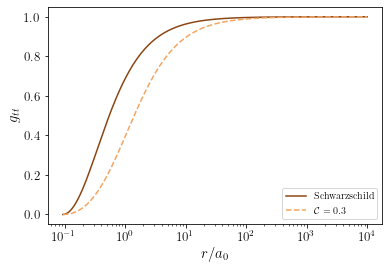

In [22]:
c = 0.3
sigma = (1-c)/(3*k)
#Range of vals

kk = 10**-10
start = sigma
end = 10**4
r_vals = np.linspace(np.log(start/kk), np.log(end/kk), 10**4)
r_eval = kk*np.exp(r_vals)

schwa = [((1-(sigma/r))/(1+(sigma/r)))**2 for r in r_eval]

# Plot the solution
plt.plot(r_eval, schwa, c = 'saddlebrown', linestyle ='-', label=r'$\mathrm{Schwarzschild}$')
plt.plot(r_eval, gtt(r_eval),  c = 'sandybrown', linestyle ='--', label='$\mathcal{C}=0.3$')
plt.xlabel('$r/{a_0}$', fontsize = 15)
plt.ylabel(r'$g_{tt}$', fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xscale('log')
plt.legend(loc = 'lower right')
plt.savefig('..//figures//gtt.pdf')
plt.show()

del c

## Effective Potential

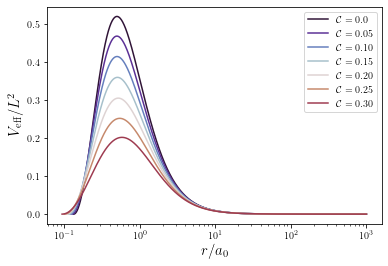

In [23]:
def v_eff(r):
    return gtt(r)/(np.exp(g(r))*r**2)

new_c_vals = [10**-30, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
colors = plt.cm.twilight_shifted(np.linspace(0,0.8,len(new_c_vals)))

for i in range(len(new_c_vals)):
    c_val = new_c_vals[i]
    c = c_val
    kk = 10**-20
    start = (1-c)/(3*(5/2))
    end = 10**3
    r_vals = np.linspace(np.log(start/kk), np.log(end/kk), 10**3)
    r_eval = kk*np.exp(r_vals)

    if c_val == 10**-30:
        plt.plot(r_eval, v_eff(r_eval), label = '$\mathcal C = 0.0$', color=colors[i])
    else:
        plt.plot(r_eval, v_eff(r_eval), label = '$\mathcal C = {:.2f}$'.format(c), color=colors[i])
plt.xscale('log')
plt.xlabel('$r/a_0$', fontsize = 15)
plt.ylabel('$V_\mathrm{{eff}}/L^2$', fontsize = 15)
plt.legend()
plt.savefig('..//figures//veff.pdf')
plt.show()

## Light Ring

Define relevant quantities.

In [24]:
def f_prime(r):
    return ((-4 + c) * (-12 * k * r * (1 + k * r)**4 + c**5 * (3 + 8 * k * r + 4 * k**2 * r**2) + 
          4 * c**4 * (-3 - 5 * k * r + 5 * k**2 * r**2 + 4 * k**3 * r**3) - 
          c * (1 + k * r)**2 * (-3 - 26 * k * r - 75 * k**2 * r**2 + 12 * k**3 * r**3) + 
          6 * c**3 * (3 + 4 * k * r - 3 * k**2 * r**2 + 10 * k**3 * r**3 + 6 * k**4 * r**4) + 
          4 * c**2 * (-3 - 8 * k * r - 22 * k**2 * r**2 - 42 * k**3 * r**3 - 3 * k**4 * r**4 + 6 * k**5 * r**5))) / \
        (2 * (-1 + c) * r * (1 + k * r) * (1 + c**2 + 4 * k * r + 3 * k**2 * r**2 + 2 * c * (-1 + k * r)) * 
         (c**3 + 2 * c**2 * k * r * (5 + k * r) - 2 * (1 + k * r)**2 * (-1 + 3 * k * r) + 
          c * (-3 - 8 * k * r + 17 * k**2 * r**2 + 6 * k**3 * r**3)))

def g_prime(r):
    return -(((-4 + c) * ((1 + k * r)**2 + c**2 * (1 + 2 * k * r) + 
           2 * c * (-1 - 2 * k * r + k**2 * r**2))) / 
         ((-1 + c) * r * (1 + k * r) * (1 + c**2 + 4 * k * r + 3 * k**2 * r**2 + 2 * c * (-1 + k * r))))

def lr_eqn(r):
    return -2+r*f_prime(r)-r*g_prime(r)

def circ_lr(r):
    return 2*np.pi*r*np.sqrt(grr(r))

def circ_lr_card(r):
    return 2*np.pi*r

def circum(r):
    return 2*np.pi*np.sqrt(grr(r))

def ehr(c):
    return 2*(1-c)/15

def gtt_card(r, c, sigma):
    return (np.exp(-((np.sqrt(c) * (np.pi - 2 * np.arctan((1 - c + r) / (np.sqrt(c) * np.sqrt(2 - c + 2 * sigma)))) / np.sqrt(2 - c + 2 * sigma)))) * (r - sigma)) / r

def gttcard_prime(r, c, sigma):
    return (np.exp(-((np.sqrt(c) * (np.pi - 2 * np.arctan((1 - c + r) / (np.sqrt(c) * np.sqrt(2 - c + 2 * sigma)))) / np.sqrt(2 - c + 2 * sigma)))) * (2*c * (r - sigma)**2 + (1 + r)**2 * sigma)) / (r**2 * (1 - 2 * (-1 + c) * r + r**2 + 2 * c * sigma))

def lr_eqncard(r):
    return 2*gtt_card(r,c,sigma)-r*gttcard_prime(r,c,sigma)

The light ring must be given by

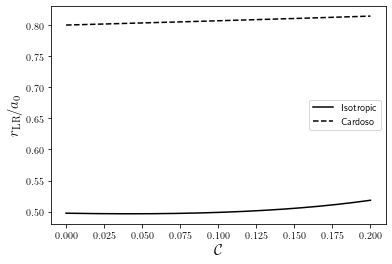

In [25]:
c_vals = np.linspace(10**-20, 0.2, 10**4)

lr_vals_1 = []

for c_val in c_vals:
    c = c_val
    sigma = 2*(1-c)/15
    lr_vals_1.append(*fsolve(lr_eqn, 0.5))


lr_vals_card = []

for c_val in c_vals:
    c = c_val
    sigma = 8/15
    lr_vals_card.append(*fsolve(lr_eqncard, 0.3))


plt.plot(c_vals, lr_vals_1, c = 'black', linestyle = '-', label = 'Isotropic')
plt.plot(c_vals, lr_vals_card, c = 'black', linestyle = '--', label = 'Cardoso')

plt.xlabel('$\mathcal{C}$', fontsize = 15)
plt.ylabel('$r_{\mathrm{LR}}/a_0$', fontsize = 15)
plt.savefig('..//figures//lrcfCard.pdf', bbox_inches = 'tight')
plt.legend()
plt.show()

The `sigma` we used in our spacetime is $R_{\mathrm{iso}}/a_0 = M_{\mathrm{BH}}/a_0$ whereas in Cardoso, we made it $R_{\mathrm{Schw}}/a_0 = 2M_{\mathrm{BH}}/a_0$. The two black holes must have the same mass in vacuum. If $M_{\mathrm{BH}}/a_0 = 4/15$ in vacuum, then Cardoso's sigma must be $8/15$.

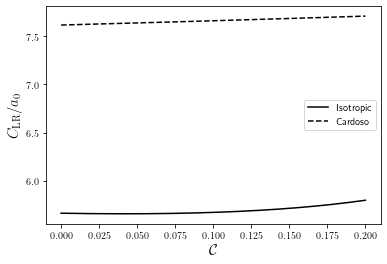

In [26]:
plt.plot(c_vals, [circ_lr(r) for r in lr_vals_1], c = 'black', linestyle = '-', label = 'Isotropic')
plt.plot(c_vals, [circ_lr(r) for r in lr_vals_card], c = 'black', linestyle = '--', label = 'Cardoso')

plt.xlabel('$\mathcal{C}$', fontsize = 15)
plt.ylabel('$C_{\mathrm{LR}}/a_0$', fontsize = 15)
plt.savefig('..//figures//circcfCard.pdf', bbox_inches = 'tight')
plt.legend()
plt.show()

Increasing the compactness decreases the size of the black hole. We can interpret this as the light ring following the black hole horizon until the increasing mass within it dominates and makes it expand.

# Angular frequency at $r_{\mathrm{LR}}$

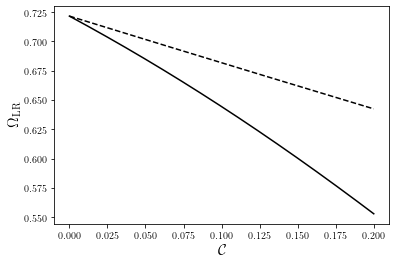

In [27]:
om_1 = []

for i in range(len(lr_vals_1)):
    c = c_vals[i]
    om_1.append(np.sqrt(gtt(lr_vals_1[i])/(np.exp(g(lr_vals_1[i]))*lr_vals_1[i]**2)))

om_card = []

for i in range(len(lr_vals_card)):
    c = c_vals[i]
    sigma = 8/15
    om_card.append(np.sqrt(gtt_card(lr_vals_card[i],c,sigma))/lr_vals_card[i])

plt.plot(c_vals, om_1, c = 'black', linestyle = '-', label = '$\mathrm{Isotropic}$')
plt.plot(c_vals, om_card, c = 'black', linestyle = '--', label = '$\mathrm{Schwarzschild}$')
plt.xlabel('$\mathcal{C}$', fontsize = 15)
plt.ylabel('$\Omega_{\mathrm{LR}}$', fontsize = 15)
plt.savefig('..//figures//angfreqcfcard.pdf', bbox_inches = 'tight')
plt.show()

# Impact Parameter

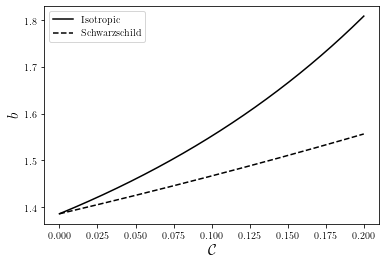

In [28]:
imp_1 = []

for i in range(len(lr_vals_1)):
    imp_1.append(1/om_1[i])

imp_card = []

for i in range(len(lr_vals_card)):
    imp_card.append(1/om_card[i])

plt.plot(c_vals, imp_1, c = 'black', linestyle = '-', label = '$\mathrm{Isotropic}$')
plt.plot(c_vals, imp_card, c = 'black', linestyle = '--', label = '$\mathrm{Schwarzschild}$')
plt.xlabel('$\mathcal{C}$', fontsize = 15)
plt.ylabel('$b$', fontsize = 15)
plt.legend()
plt.savefig('..//figures//impcfcard.pdf', bbox_inches = 'tight')
plt.savefig('..//figures//impcfcard.png', bbox_inches = 'tight', dpi = 300)
plt.show()

## Extra figures

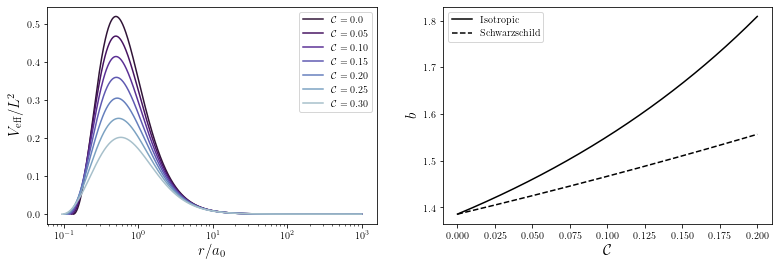

In [29]:
plt.figure(figsize = (13, 4))

plt.subplot(1,2,1)
def v_eff(r):
    return gtt(r)/(np.exp(g(r))*r**2)

new_c_vals = [10**-30, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
colors = plt.cm.twilight_shifted(np.linspace(0,0.4,len(new_c_vals)))

for i in range(len(new_c_vals)):
    c_val = new_c_vals[i]
    c = c_val
    kk = 10**-20
    start = (1-c)/(3*(5/2))
    end = 10**3
    r_vals = np.linspace(np.log(start/kk), np.log(end/kk), 10**3)
    r_eval = kk*np.exp(r_vals)

    if c_val == 10**-30:
        plt.plot(r_eval, v_eff(r_eval), label = '$\mathcal C = 0.0$', color=colors[i])
    else:
        plt.plot(r_eval, v_eff(r_eval), label = '$\mathcal C = {:.2f}$'.format(c), color=colors[i])
plt.xscale('log')
plt.xlabel('$r/a_0$', fontsize = 15)
plt.ylabel('$V_\mathrm{{eff}}/L^2$', fontsize = 15)
plt.legend()
plt.savefig('..//figures//veff.pdf')

plt.subplot(1,2,2)
plt.plot(c_vals, imp_1, c = 'black', linestyle = '-', label = '$\mathrm{Isotropic}$')
plt.plot(c_vals, imp_card, c = 'black', linestyle = '--', label = '$\mathrm{Schwarzschild}$')
plt.xlabel('$\mathcal{C}$', fontsize = 15)
plt.ylabel('$b$', fontsize = 15)
plt.legend()

plt.savefig('..//figures//cardcomp.pdf', bbox_inches = 'tight')
plt.show()

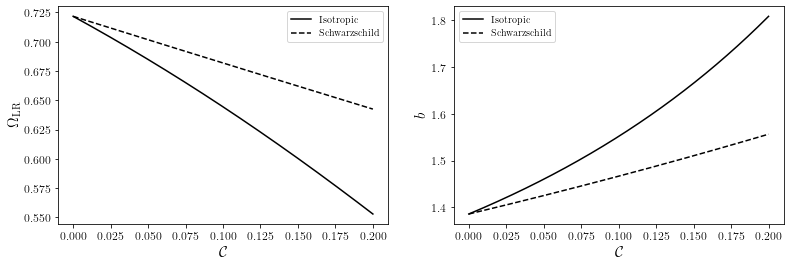

In [30]:
plt.figure(figsize = (13, 4))

plt.subplot(1,2,1)
plt.plot(c_vals, om_1, c = 'black', linestyle = '-', label = '$\mathrm{Isotropic}$')
plt.plot(c_vals, om_card, c = 'black', linestyle = '--', label = '$\mathrm{Schwarzschild}$')
plt.xlabel('$\mathcal{C}$', fontsize = 15)
plt.ylabel('$\Omega_{\mathrm{LR}}$', fontsize = 15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize = 10)

plt.subplot(1,2,2)
plt.plot(c_vals, imp_1, c = 'black', linestyle = '-', label = '$\mathrm{Isotropic}$')
plt.plot(c_vals, imp_card, c = 'black', linestyle = '--', label = '$\mathrm{Schwarzschild}$')
plt.xlabel('$\mathcal{C}$', fontsize = 15)
plt.ylabel('$b$', fontsize = 15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize = 10)

plt.savefig('..//figures//isocard.pdf', bbox_inches = 'tight')
plt.show()